<a href="https://colab.research.google.com/github/Makurunge/Network-visualization/blob/main/OPTIMAL_CONTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing the required library
import numpy as np
import pandas as pd
import networkx as nx
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import pandas
import pandas as pd

# Step 3: Define the path to your Excel file in Google Drive
file_path = '/content/drive/MyDrive/OPTIMAL_CONTROL_WORK/DATA.xlsx'

# Step 4: Load all sheet names
xls = pd.ExcelFile(file_path)
print("Available Sheets:", xls.sheet_names)

# Step 5: Extract only column 1 (Date) and column 5 (Close) from all sheets
all_data = pd.DataFrame()

for sheet in xls.sheet_names:
    # Read sheet without header, then select col 0 (Date) and col 4 (Close)
    df = pd.read_excel(file_path, sheet_name=sheet, header=None)
    temp = df.iloc[3:, [0, 4]].copy()   # skip first 3 rows (metadata), take columns 1 & 5

    # Rename columns
    temp.columns = ["Date", sheet]

    # Merge into final dataset
    if all_data.empty:
        all_data = temp
    else:
        all_data = pd.merge(all_data, temp, on="Date", how="outer")

# Step 6: Clean up Date column
all_data["Date"] = pd.to_datetime(all_data["Date"], errors="coerce")
all_data = all_data.dropna(subset=["Date"]).sort_values("Date").reset_index(drop=True)

# Step 7: Save to Excel in Google Drive
output_path = '/content/drive/MyDrive/OPTIMAL_CONTROL_WORK/Cleaned_Closing_Prices.xlsx'
all_data.to_excel(output_path, index=False)

# Step 8: Show preview
print("\n✅ Cleaned dataset (first 10 rows):")
print(all_data.head(10))
print(f"\nSaved to: {output_path}")



Mounted at /content/drive
Available Sheets: ['SANLAM', 'SHORPITE', 'BHP', 'ASPEN', 'SASOL', 'BRAIT', 'WHL', 'TKG', 'AGL', 'SBK']

✅ Cleaned dataset (first 10 rows):
        Date SANLAM SHORPITE    BHP  ASPEN  SASOL BRAIT   WHL   TKG    AGL  \
0 2016-07-15   6250    17515  18914  37852  39756   NaN  8450  6499  15846   
1 2016-07-18   6286    17676  18437  37490  39930   NaN  8440  6489  15737   
2 2016-07-19   6321    17511  17928  37446  40088   NaN  8437  6412  15399   
3 2016-07-20   6406    19498  17380  38056  39997   NaN  8579  6450  14384   
4 2016-07-21   6447    19258  17784  37654  40095   NaN  8650  6450  14929   
5 2016-07-22   6570    19949  17276  37702  40050   NaN  8627  6631  14430   
6 2016-07-25   6662    19934  17247  38250  39700   NaN  8992  6664  14555   
7 2016-07-26   6650    19860  17803  38474  39252   NaN  9000  6680  14822   
8 2016-07-27   6741    20350  18091  38341  39564   NaN  9182  6625  14924   
9 2016-07-28   6597    20204  18001  38240  38719   NaN

In [4]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Define the path to your cleaned Excel file in Google Drive
file_path = '/content/drive/MyDrive/OPTIMAL_CONTROL_WORK/Cleaned_Closing_Prices.xlsx'

# Step 3: Load the cleaned dataset
df = pd.read_excel(file_path)

# Step 4: Forward-fill missing values
# This fills missing values in each column with the last available value above
df_ffill = df.fillna(method='ffill')

# Step 5: (Optional) Backward-fill in case the first rows are still missing
# df_ffill = df_ffill.fillna(method='bfill')

# Step 6: Save the forward-filled dataset back to Excel
output_path = '/content/drive/MyDrive/OPTIMAL_CONTROL_WORK/Cleaned_Closing_Prices_Filled.xlsx'
df_ffill.to_excel(output_path, index=False)

# Step 7: Show preview
print("\n✅ Forward-filled dataset (first 10 rows):")
print(df_ffill.head())
print(f"\nSaved to: {output_path}")

/tmp/ipython-input-2463587172.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')



✅ Forward-filled dataset (first 10 rows):
        Date  SANLAM  SHORPITE    BHP  ASPEN  SASOL  BRAIT   WHL   TKG    AGL  \
0 2016-07-15    6250     17515  18914  37852  39756    NaN  8450  6499  15846   
1 2016-07-18    6286     17676  18437  37490  39930    NaN  8440  6489  15737   
2 2016-07-19    6321     17511  17928  37446  40088    NaN  8437  6412  15399   
3 2016-07-20    6406     19498  17380  38056  39997    NaN  8579  6450  14384   
4 2016-07-21    6447     19258  17784  37654  40095    NaN  8650  6450  14929   

     SBK  
0  13258  
1  13281  
2  13458  
3  13675  
4  13739  

Saved to: /content/drive/MyDrive/OPTIMAL_CONTROL_WORK/Cleaned_Closing_Prices_Filled.xlsx


In [5]:
# Forward-fill first
df_ffill = df.fillna(method='ffill')

# Then backward-fill for any remaining NaNs (e.g., top rows)
df_ffill = df_ffill.fillna(method='bfill')
df_ffill.tail(20)


/tmp/ipython-input-229708545.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
/tmp/ipython-input-229708545.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_ffill.fillna(method='bfill')


,Date,SANLAM,SHORPITE,BHP,ASPEN,SASOL,BRAIT,WHL,TKG,AGL,SBK
1230,2021-06-18,6196,15552,39944,16305,21089,NaN,5523,4631,54488,12700
1231,2021-06-21,6118,15433,40414,15948,20800,NaN,5435,4568,54829,12542
1232,2021-06-22,6112,15250,41136,15973,21475,NaN,5312,4476,55864,12497
1233,2021-06-23,6105,15228,41590,16112,22050,NaN,5361,4497,56339,12592
1234,2021-06-24,6171,15362,41935,16127,22283,NaN,5436,4484,57403,12699
1235,2021-06-25,6198,15400,42316,15900,22648,NaN,5439,4465,58543,12765
1236,2021-06-28,6060,15277,42500,15687,21811,NaN,5279,4428,57364,12406
1237,2021-06-29,6189,15547,42701,15970,21872,NaN,5458,4517,57286,12732
1238,2021-06-30,6137,15544,42224,16209,21801,NaN,5391,4637,56942,12761
1239,2021-07-01,6114,15680,42790,16287,22466,NaN,5403,4487,57562,12656


In [6]:
# Instead of forward/backward fill, fill NaNs in BRAIT with random numbers
df['BRAIT'] = df['BRAIT'].apply(
    lambda x: np.random.randint(1000, 5000) if pd.isna(x) else x
)

# Now check the last 20 rows
df.head(20)


,Date,SANLAM,SHORPITE,BHP,ASPEN,SASOL,BRAIT,WHL,TKG,AGL,SBK
0,2016-07-15,6250,17515,18914,37852,39756,4291,8450,6499,15846,13258
1,2016-07-18,6286,17676,18437,37490,39930,4025,8440,6489,15737,13281
2,2016-07-19,6321,17511,17928,37446,40088,2021,8437,6412,15399,13458
3,2016-07-20,6406,19498,17380,38056,39997,3334,8579,6450,14384,13675
4,2016-07-21,6447,19258,17784,37654,40095,3399,8650,6450,14929,13739
5,2016-07-22,6570,19949,17276,37702,40050,4685,8627,6631,14430,13690
6,2016-07-25,6662,19934,17247,38250,39700,2854,8992,6664,14555,13855
7,2016-07-26,6650,19860,17803,38474,39252,2626,9000,6680,14822,13900
8,2016-07-27,6741,20350,18091,38341,39564,4605,9182,6625,14924,13969
9,2016-07-28,6597,20204,18001,38240,38719,3396,8980,6450,15708,13784


In [7]:
# Make sure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df = df.set_index('Date')

# Optional: sort by date (ascending)
df = df.sort_index()

print(df.head())

            SANLAM  SHORPITE    BHP  ASPEN  SASOL  BRAIT   WHL   TKG    AGL  \
Date                                                                          
2016-07-15    6250     17515  18914  37852  39756   4291  8450  6499  15846   
2016-07-18    6286     17676  18437  37490  39930   4025  8440  6489  15737   
2016-07-19    6321     17511  17928  37446  40088   2021  8437  6412  15399   
2016-07-20    6406     19498  17380  38056  39997   3334  8579  6450  14384   
2016-07-21    6447     19258  17784  37654  40095   3399  8650  6450  14929   

              SBK  
Date               
2016-07-15  13258  
2016-07-18  13281  
2016-07-19  13458  
2016-07-20  13675  
2016-07-21  13739  


In [8]:
# Summary statistics (includes mean, std, min, max, etc.)
summary = df.describe()
print(summary)

            SANLAM      SHORPITE           BHP         ASPEN         SASOL  \
count  1250.000000   1250.000000   1250.000000   1250.000000   1250.000000   
mean   6953.035200  17222.808000  30138.616000  19641.277600  32852.159200   
std     973.134881   4066.538297   7156.158382   8421.259376  12912.080906   
min    4544.000000  10028.000000  17247.000000   6500.000000   2188.000000   
25%    6192.250000  13590.500000  24166.500000  12107.250000  22666.250000   
50%    6951.000000  17516.500000  30150.000000  15862.000000  37400.000000   
75%    7699.250000  20223.750000  34530.250000  27600.000000  41875.000000   
max    9620.000000  27550.000000  49309.000000  38474.000000  57868.000000   

             BRAIT          WHL          TKG           AGL          SBK  
count  1250.000000  1250.000000  1250.000000   1250.000000   1250.00000  
mean   2937.210400  5413.132000  5382.793600  33438.470400  15794.56240  
std    1161.058485  1354.365947  1855.936058  11975.374482   3204.81706  
m

In [9]:
import pandas as pd

# Make pandas show more columns
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

# Now describe will print in one full table
summary = df.describe().T   # transpose (variables as rows, stats as columns)
print(summary)

           count        mean           std      min       25%      50%       75%      max
SANLAM    1250.0   6953.0352    973.134881   4544.0   6192.25   6951.0   7699.25   9620.0
SHORPITE  1250.0  17222.8080   4066.538297  10028.0  13590.50  17516.5  20223.75  27550.0
BHP       1250.0  30138.6160   7156.158382  17247.0  24166.50  30150.0  34530.25  49309.0
ASPEN     1250.0  19641.2776   8421.259376   6500.0  12107.25  15862.0  27600.00  38474.0
SASOL     1250.0  32852.1592  12912.080906   2188.0  22666.25  37400.0  41875.00  57868.0
BRAIT     1250.0   2937.2104   1161.058485   1001.0   1881.00   2898.5   3953.50   4990.0
WHL       1250.0   5413.1320   1354.365947   2558.0   4620.75   5393.5   6292.25   9410.0
TKG       1250.0   5382.7936   1855.936058   1486.0   4049.25   5366.5   6776.00   9950.0
AGL       1250.0  33438.4704  11975.374482  14384.0  24840.75  31800.5  39646.25  67770.0
SBK       1250.0  15794.5624   3204.817060   8441.0  13539.75  16048.0  18372.50  22741.0


In [10]:
import pandas as pd

# Generate summary statistics
summary = df.describe().T  # Transpose: rows = variables, columns = stats

# Export to LaTeX table
latex_table = summary.to_latex(index=True, float_format="%.2f")

# Save to file (optional)
with open("summary_statistics.tex", "w") as f:
    f.write(latex_table)

print(latex_table)

\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
SANLAM & 1250.00 & 6953.04 & 973.13 & 4544.00 & 6192.25 & 6951.00 & 7699.25 & 9620.00 \\
SHORPITE & 1250.00 & 17222.81 & 4066.54 & 10028.00 & 13590.50 & 17516.50 & 20223.75 & 27550.00 \\
BHP & 1250.00 & 30138.62 & 7156.16 & 17247.00 & 24166.50 & 30150.00 & 34530.25 & 49309.00 \\
ASPEN & 1250.00 & 19641.28 & 8421.26 & 6500.00 & 12107.25 & 15862.00 & 27600.00 & 38474.00 \\
SASOL & 1250.00 & 32852.16 & 12912.08 & 2188.00 & 22666.25 & 37400.00 & 41875.00 & 57868.00 \\
BRAIT & 1250.00 & 2937.21 & 1161.06 & 1001.00 & 1881.00 & 2898.50 & 3953.50 & 4990.00 \\
WHL & 1250.00 & 5413.13 & 1354.37 & 2558.00 & 4620.75 & 5393.50 & 6292.25 & 9410.00 \\
TKG & 1250.00 & 5382.79 & 1855.94 & 1486.00 & 4049.25 & 5366.50 & 6776.00 & 9950.00 \\
AGL & 1250.00 & 33438.47 & 11975.37 & 14384.00 & 24840.75 & 31800.50 & 39646.25 & 67770.00 \\
SBK & 1250.00 & 15794.56 & 3204.82 & 8441.00 & 13539.75 & 16048.00 & 18372

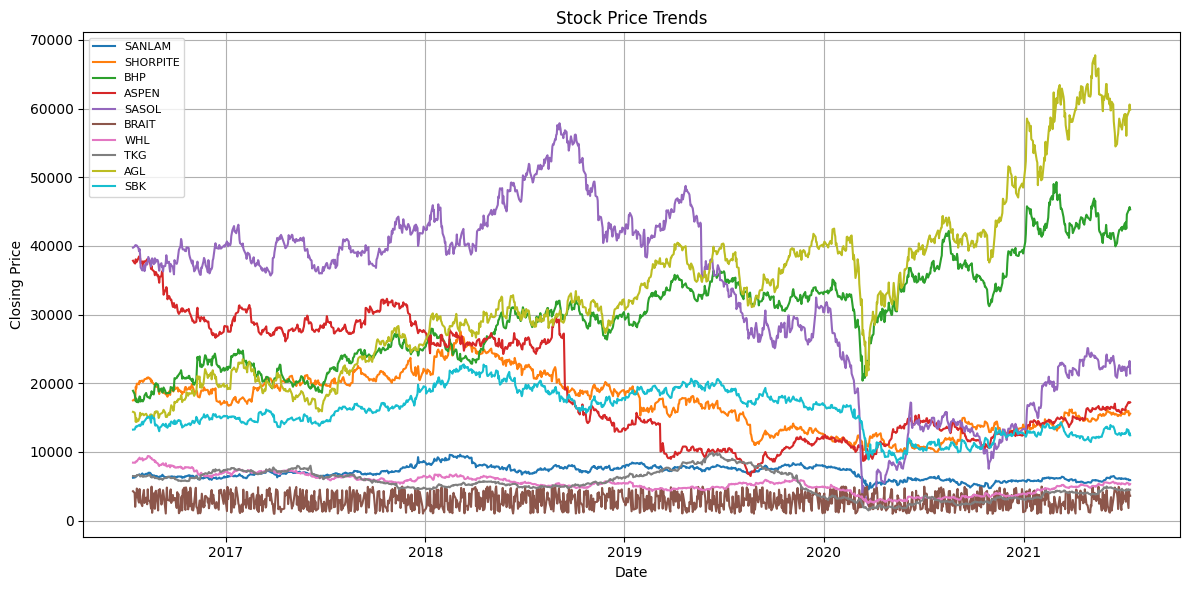

In [11]:
import matplotlib.pyplot as plt

# If you have a Date column, set it as index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Plot all stocks in one graph
plt.figure(figsize=(12,6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title("Stock Price Trends")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend(loc="upper left", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

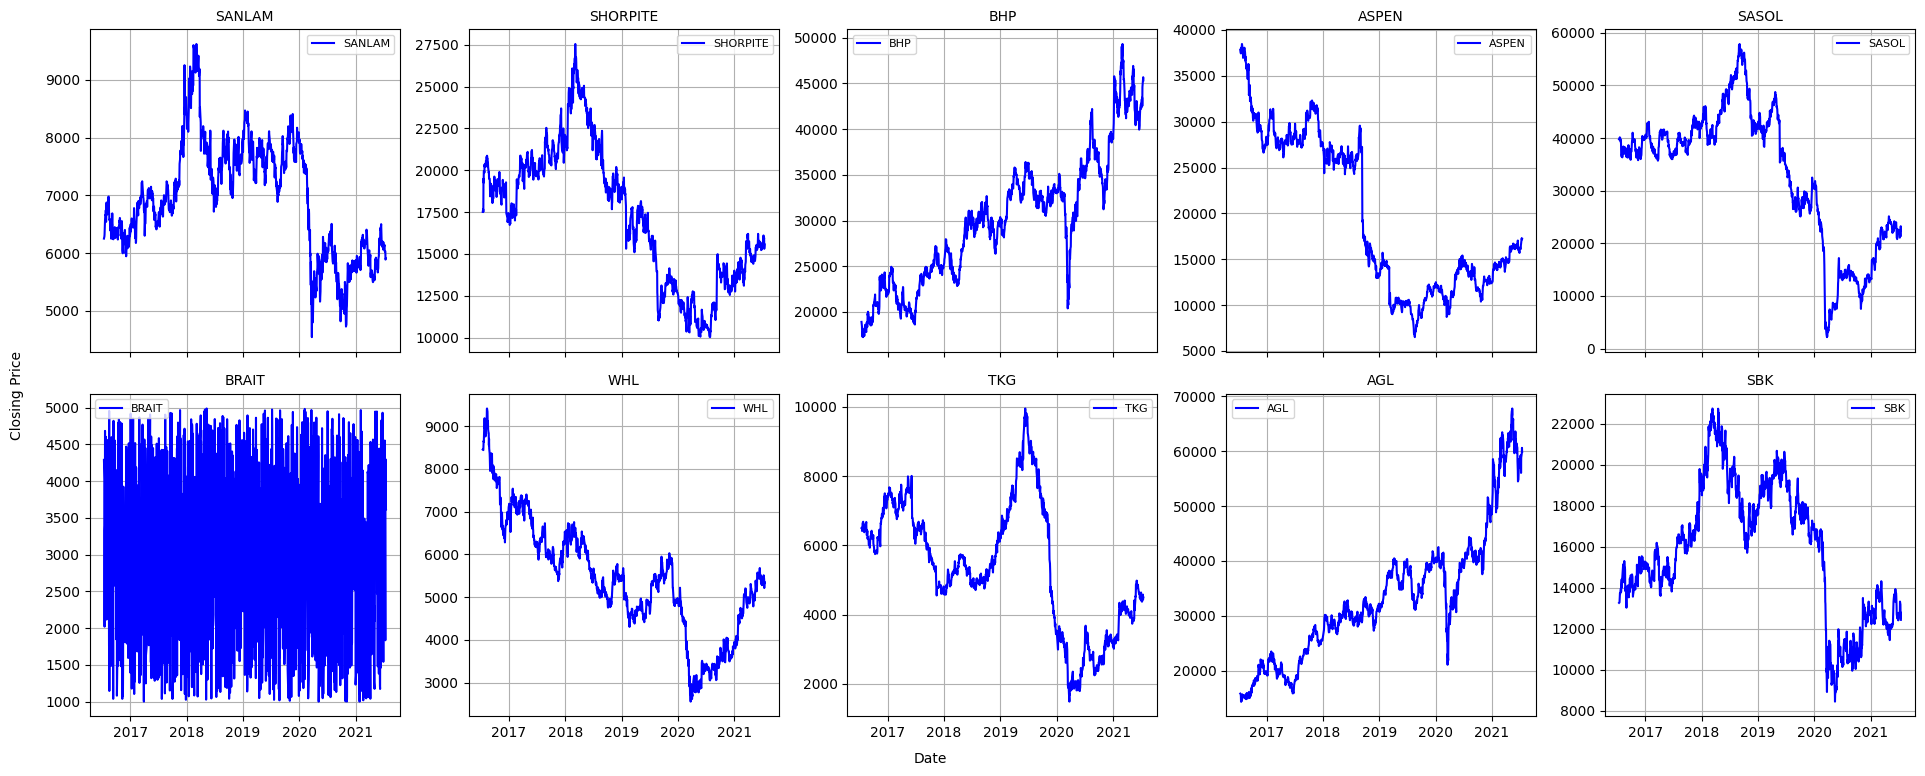

In [12]:
import matplotlib.pyplot as plt
import math

# Number of stocks
n_stocks = len(df.columns)

# Define grid size (2 rows x 5 columns for 10 stocks, adjust automatically if more)
n_cols = 5
n_rows = math.ceil(n_stocks / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8), sharex=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each stock in its subplot
for i, column in enumerate(df.columns):
    axes[i].plot(df.index, df[column], label=column, color="blue")
    axes[i].set_title(column, fontsize=10)
    axes[i].grid(True)
    axes[i].legend(fontsize=8)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Add a global X and Y label
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'Closing Price', va='center', rotation='vertical')

plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# Save figure as PNG
plt.savefig("stock_trends.png", dpi=300)
plt.show()

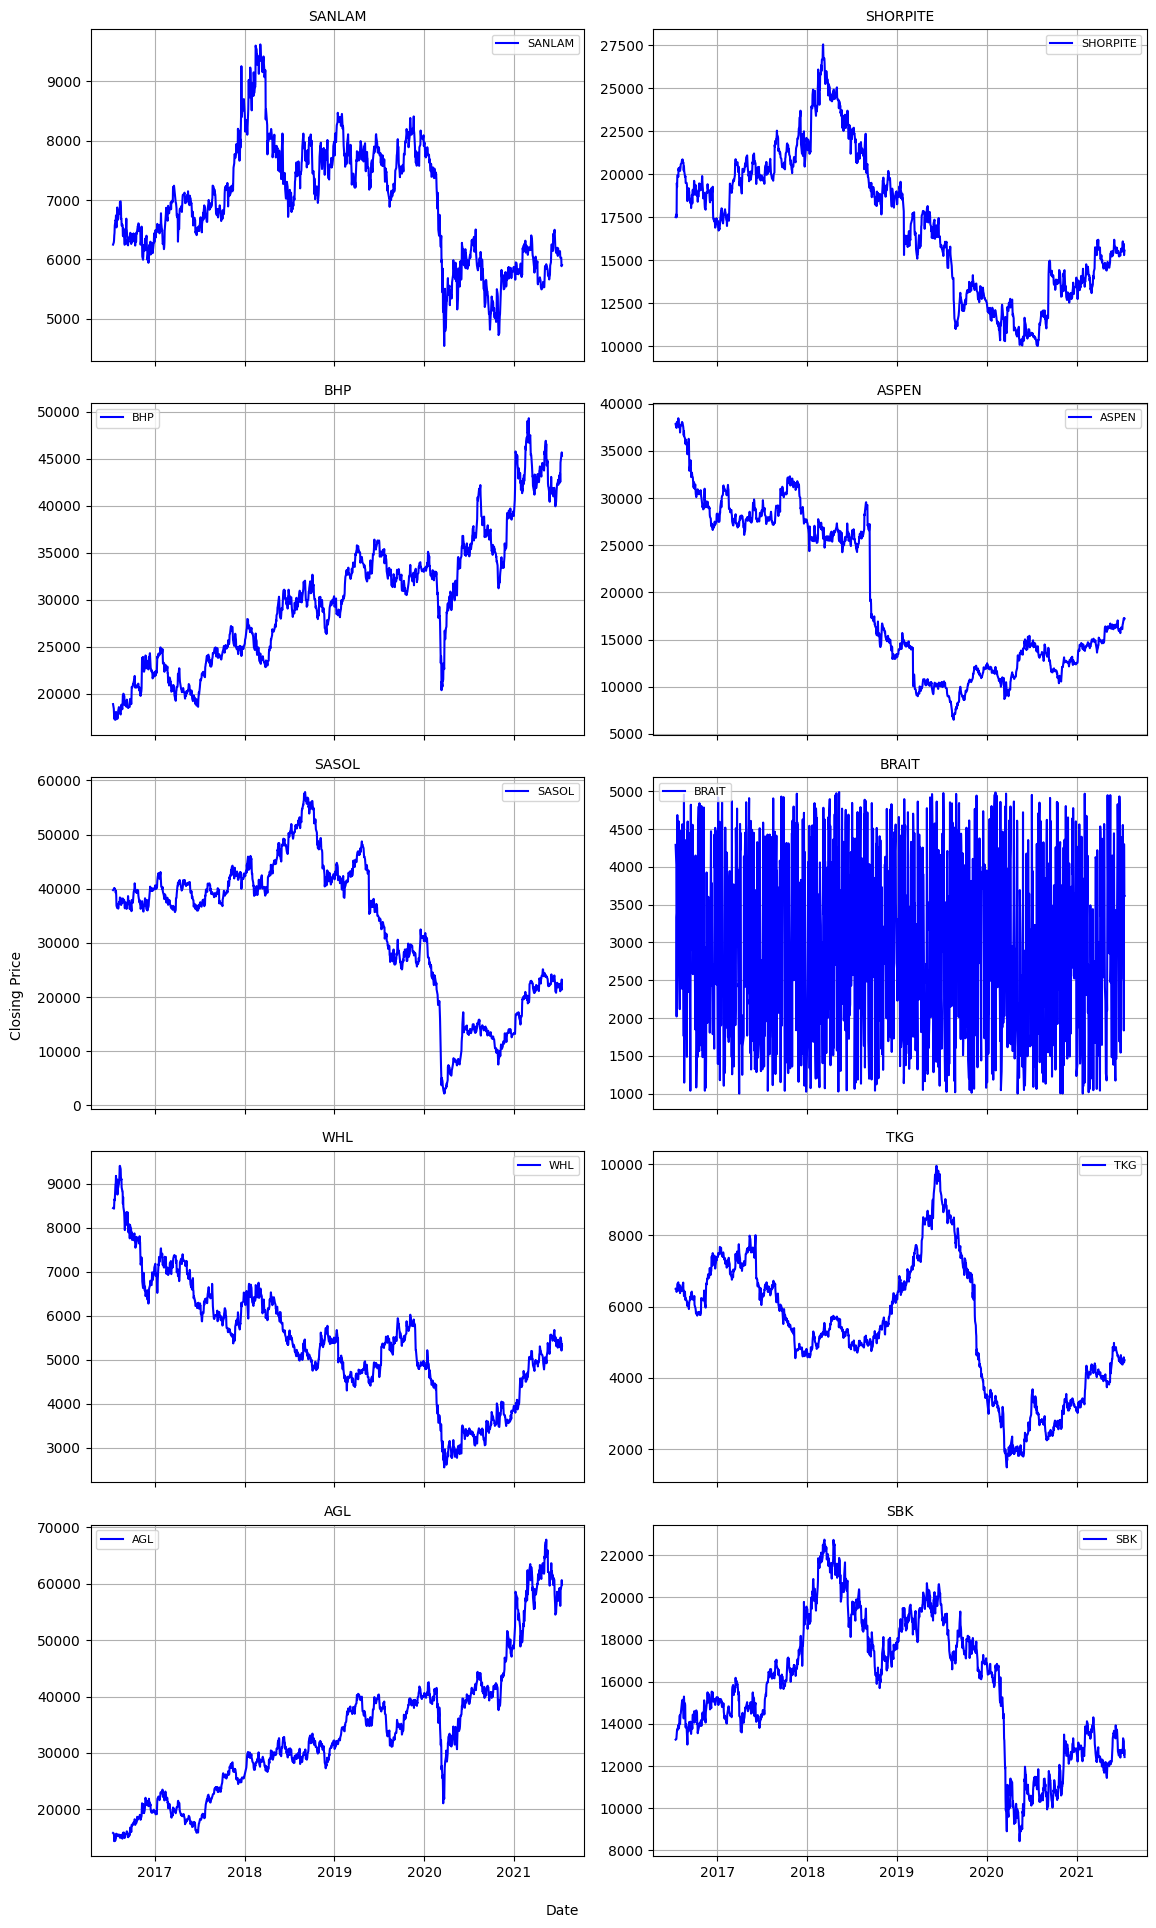

In [13]:
import matplotlib.pyplot as plt
import math

# Exclude 'Date' column if present
data_columns = [col for col in df.columns if col.lower() != 'date']

# Number of stocks (after excluding Date)
n_stocks = len(data_columns)

# Define grid size (5 rows x 2 columns for 10 stocks)
n_rows = 5
n_cols = 2

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 20), sharex=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each stock in its subplot
for i, column in enumerate(data_columns):
    axes[i].plot(df.index, df[column], label=column, color="blue")
    axes[i].set_title(column, fontsize=10)
    axes[i].grid(True)
    axes[i].legend(fontsize=8)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a global X and Y label
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'Closing Price', va='center', rotation='vertical')

plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# Save figure as PNG
plt.savefig("stock_trends_5x2.png", dpi=300)
plt.show()

In [15]:
import matplotlib.pyplot as plt
import math
from google.colab import files

# Exclude 'Date' column if present
data_columns = [col for col in df.columns if col.lower() != 'date']

# Number of stocks
n_stocks = len(data_columns)

# Define grid size (5 rows x 2 columns)
n_rows = 5
n_cols = 2

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 20), sharex=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each stock
for i, column in enumerate(data_columns):
    axes[i].plot(df.index, df[column], label=column, color="blue")
    axes[i].set_title(column, fontsize=10)
    axes[i].grid(True)
    axes[i].legend(fontsize=8)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 1])

# Save the full figure first
fig.savefig("stock_trends_full.png", dpi=300)

# Now save each row separately
for row in range(n_rows):
    start_idx = row * n_cols
    end_idx = start_idx + n_cols
    fig_row, axes_row = plt.subplots(1, n_cols, figsize=(12, 4), sharex=True)

    for idx, ax in enumerate(axes_row):
        global_idx = start_idx + idx
        if global_idx < n_stocks:
            # Copy content from original axis
            for line in axes[global_idx].get_lines():
                ax.plot(line.get_xdata(), line.get_ydata(), color=line.get_color(), label=line.get_label())
            ax.set_title(data_columns[global_idx], fontsize=10)
            ax.grid(True)
            ax.legend(fontsize=8)
        else:
            fig_row.delaxes(ax)  # remove extra axes if no stock

    plt.tight_layout()
    filename = f"stock_trends_row_{row+1}.png"
    fig_row.savefig(filename, dpi=300)
    plt.close(fig_row)  # close to free memory
    files.download(filename)  # download in Colab

plt.close(fig)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import pandas as pd

# If 'prices' not defined, try to use 'df'
if 'prices' not in globals():
    if 'df' in globals():
        prices = df.copy()
        print("Using existing DataFrame 'df' as 'prices'.")
    else:
        raise NameError("No DataFrame named 'prices' or 'df' found. See other options below to load/create prices.")

# Ensure Date index (if Date column present)
for date_col in ['Date', 'date']:
    if date_col in prices.columns:
        prices[date_col] = pd.to_datetime(prices[date_col])
        prices.set_index(date_col, inplace=True)
        print(f"Set index from column '{date_col}'")

# Make sure index is datetime
prices.index = pd.to_datetime(prices.index)

# Ensure numeric values (remove stray strings like commas)
prices = prices.apply(pd.to_numeric, errors='coerce')

# Sort by date and forward-fill missing values (adjust to your preferred method)
prices = prices.sort_index()
prices = prices.ffill().dropna(how='all')


print("Prepared 'prices' DataFrame:")
print(prices.head())


Using existing DataFrame 'df' as 'prices'.
Prepared 'prices' DataFrame:
            SANLAM  SHORPITE    BHP  ASPEN  SASOL  BRAIT   WHL   TKG    AGL    SBK
Date                                                                              
2016-07-15    6250     17515  18914  37852  39756   4291  8450  6499  15846  13258
2016-07-18    6286     17676  18437  37490  39930   4025  8440  6489  15737  13281
2016-07-19    6321     17511  17928  37446  40088   2021  8437  6412  15399  13458
2016-07-20    6406     19498  17380  38056  39997   3334  8579  6450  14384  13675
2016-07-21    6447     19258  17784  37654  40095   3399  8650  6450  14929  13739


In [17]:
import pandas as pd
import numpy as np

# ... your previous code up to this point ...

# Sort by date
prices = prices.sort_index()

# Replace missing values in one column (e.g., 'SANLAM') with random numbers between 3000 and 10000
col_to_fill = 'BRAIT'
if col_to_fill in prices.columns:
    prices[col_to_fill] = prices[col_to_fill].apply(
        lambda x: np.random.randint(3000, 10001) if pd.isna(x) else x
    )

print("Prepared 'prices' DataFrame with random numbers in column:", col_to_fill)
print(prices.head())


Prepared 'prices' DataFrame with random numbers in column: BRAIT
            SANLAM  SHORPITE    BHP  ASPEN  SASOL  BRAIT   WHL   TKG    AGL    SBK
Date                                                                              
2016-07-15    6250     17515  18914  37852  39756   4291  8450  6499  15846  13258
2016-07-18    6286     17676  18437  37490  39930   4025  8440  6489  15737  13281
2016-07-19    6321     17511  17928  37446  40088   2021  8437  6412  15399  13458
2016-07-20    6406     19498  17380  38056  39997   3334  8579  6450  14384  13675
2016-07-21    6447     19258  17784  37654  40095   3399  8650  6450  14929  13739


In [18]:
print(prices.shape)
print(prices.head())

(1250, 10)
            SANLAM  SHORPITE    BHP  ASPEN  SASOL  BRAIT   WHL   TKG    AGL    SBK
Date                                                                              
2016-07-15    6250     17515  18914  37852  39756   4291  8450  6499  15846  13258
2016-07-18    6286     17676  18437  37490  39930   4025  8440  6489  15737  13281
2016-07-19    6321     17511  17928  37446  40088   2021  8437  6412  15399  13458
2016-07-20    6406     19498  17380  38056  39997   3334  8579  6450  14384  13675
2016-07-21    6447     19258  17784  37654  40095   3399  8650  6450  14929  13739


In [19]:
#Define your risk-free rate:
rf_const = 0.05 / 252  # 5% annual converted to daily

In [20]:
import pandas as pd

# If 'prices' not defined, try to use 'df'
if 'prices' not in globals():
    if 'df' in globals():
        prices = df.copy()
        print("Using existing DataFrame 'df' as 'prices'.")
    else:
        raise NameError("No DataFrame named 'prices' or 'df' found. See other options below to load/create prices.")

# Ensure Date index (if Date column present)
for date_col in ['Date', 'date']:
    if date_col in prices.columns:
        prices[date_col] = pd.to_datetime(prices[date_col])
        prices.set_index(date_col, inplace=True)
        print(f"Set index from column '{date_col}'")

# Make sure index is datetime
prices.index = pd.to_datetime(prices.index)

# Ensure numeric values (remove stray strings like commas)
prices = prices.apply(pd.to_numeric, errors='coerce')

# Sort by date and forward-fill missing values (adjust to your preferred method)
prices = prices.sort_index()
prices = prices.fillna(method='ffill').dropna(how='all')

print("Prepared 'prices' DataFrame:")
print(prices.head())


Prepared 'prices' DataFrame:
            SANLAM  SHORPITE    BHP  ASPEN  SASOL  BRAIT   WHL   TKG    AGL    SBK
Date                                                                              
2016-07-15    6250     17515  18914  37852  39756   4291  8450  6499  15846  13258
2016-07-18    6286     17676  18437  37490  39930   4025  8440  6489  15737  13281
2016-07-19    6321     17511  17928  37446  40088   2021  8437  6412  15399  13458
2016-07-20    6406     19498  17380  38056  39997   3334  8579  6450  14384  13675
2016-07-21    6447     19258  17784  37654  40095   3399  8650  6450  14929  13739


/tmp/ipython-input-3951391592.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill').dropna(how='all')


In [21]:
# quick sanity checks
print("prices shape:", prices.shape)
print("index dtype:", prices.index.dtype)
print("columns:", prices.columns.tolist()[:10])

# Then re-run your 7.4 cell (the code that computes rets = prices.pct_change() ... run_backtest(...))


prices shape: (1250, 10)
index dtype: datetime64[ns]
columns: ['SANLAM', 'SHORPITE', 'BHP', 'ASPEN', 'SASOL', 'BRAIT', 'WHL', 'TKG', 'AGL', 'SBK']


/tmp/ipython-input-3389047089.py:90: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rebal_dates = pd.date_range(idx[0], idx[-1], freq=rebalance_freq)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


=== Performance (7.4 Numerical Results) ===
Merton (dynamic): {'CAGR': np.float64(78.877156656444), 'Vol': np.float64(1.241550562765839), 'Sharpe': np.float64(4.089474442605182), 'MaxDD': -0.32173123599704334}
Equal-weight (rebal.): {'CAGR': np.float64(89.0437858958671), 'Vol': np.float64(1.2564116413079507), 'Sharpe': np.float64(4.152957096233664), 'MaxDD': -0.3217312359970437}
Equal-weight (buy&hold): {'CAGR': np.float64(inf), 'Vol': np.float64(nan), 'Sharpe': np.float64(nan), 'MaxDD': 0.0}

Latest Merton weights (no-short=True):
SANLAM      0.1
SHORPITE    0.1
BHP         0.1
ASPEN       0.1
SASOL       0.1
BRAIT       0.1
WHL         0.1
TKG         0.1
AGL         0.1
SBK         0.1
Name: 2021-07-15 00:00:00, dtype: float64


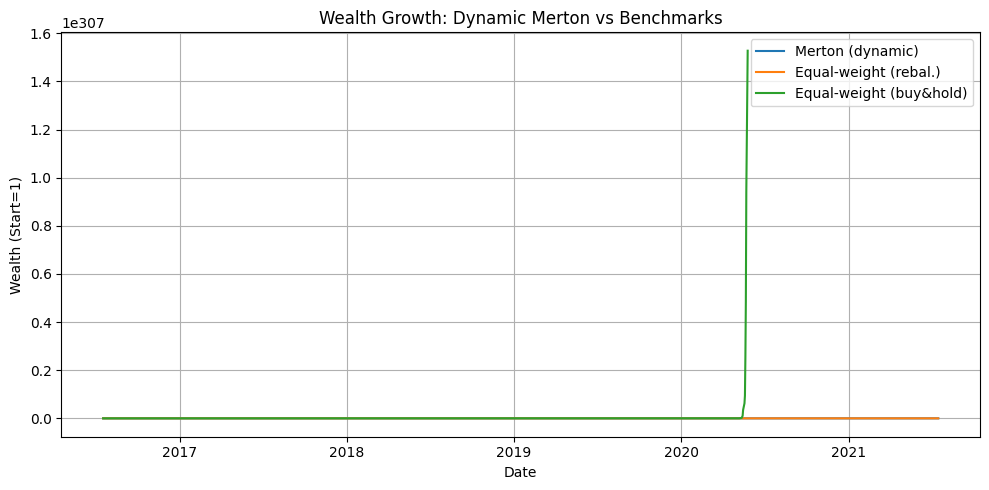

In [22]:
# ==== 7.4 Optimal control construction & numerical experiment ====
# Inputs you must provide:
# prices  : pd.DataFrame of daily closing prices (DateTime index, columns are tickers)
# rf_daily: pd.Series of daily risk-free rates (optional; if missing set rf_const)
# rf_const: float daily risk-free (e.g., 0.05/252 for 5% annual) if rf_daily is not given

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------ Parameters ------------
GAMMA = 5.0                 # relative risk aversion (can tune)
ROLLING_WINDOW = 252        # days for rolling estimation (~1 trading year)
REBAL_FREQ = 'M'            # rebalance monthly ('W', 'M', 'Q' also ok)
USE_LED_WOLF = True         # covariance shrinkage
ENFORCE_NO_SHORT = True     # project to simplex (no shorting, sum to 1)
START_WEALTH = 1.0

# ------------ Returns & risk-free prep ------------
prices = prices.sort_index()
rets = prices.pct_change().dropna()             # arithmetic daily returns
if 'rf_daily' in globals() and isinstance(rf_daily, pd.Series):
    rf = rf_daily.reindex(rets.index).fillna(method='ffill')
else:
    rf = pd.Series(rf_const, index=rets.index)   # constant daily rf

# ------------ Ledoit–Wolf shrinkage (fallback pure NumPy) ------------
def ledoit_wolf_cov(X):
    """
    X: (T, N) zero-mean returns
    Returns: shrunken covariance (N,N)
    """
    # Constant-correlation target
    T, N = X.shape
    sample_cov = np.cov(X, rowvar=False, bias=False)
    std = np.sqrt(np.diag(sample_cov))
    corr = sample_cov / np.outer(std, std)
    np.fill_diagonal(corr, 1.0)
    # average off-diagonal correlation
    r_bar = (np.sum(corr) - N) / (N*(N-1))
    F = r_bar * np.outer(std, std)
    np.fill_diagonal(F, np.diag(sample_cov))  # keep variances
    # shrinkage intensity (LW closed-form, simplified)
    Xm = X - X.mean(axis=0)
    phi_mat = (Xm**2).T @ (Xm**2) / T - sample_cov**2
    phi = phi_mat.sum()
    rho = np.sum((sample_cov - F)**2)
    delta = max(0.0, min(1.0, phi / rho)) if rho > 0 else 0.0
    return delta*F + (1-delta)*sample_cov

# ------------ Merton weights ------------
def merton_weights(mu, Sigma, rf_scalar, gamma):
    """
    mu: (N,) expected daily returns
    Sigma: (N,N) daily covariance
    rf_scalar: scalar daily risk-free (float)
    """
    N = mu.shape[0]
    excess = mu - rf_scalar
    w = (1.0 / gamma) * np.linalg.solve(Sigma, excess)  # unconstrained
    return w

# ------------ Projection to simplex (no short-selling, sum=1) ------------
def project_to_simplex(v):
    """Project vector v onto the probability simplex {w>=0, sum w = 1}."""
    v = np.asarray(v).astype(float)
    if v.sum() <= 0 or np.all(v <= 0):
        # fallback: equal weight
        return np.ones_like(v) / len(v)
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, len(u)+1) > (cssv - 1))[0][-1]
    theta = (cssv[rho] - 1) / (rho + 1.0)
    w = np.maximum(v - theta, 0)
    # numerical guard
    s = w.sum()
    return w / s if s > 0 else np.ones_like(v) / len(v)

# ------------ Rolling estimation & backtest ------------
def run_backtest(rets, rf, gamma=GAMMA, window=ROLLING_WINDOW,
                 rebalance_freq=REBAL_FREQ,
                 use_shrink=True, no_short=True, start_wealth=START_WEALTH):
    idx = rets.index
    tickers = rets.columns.tolist()
    wealth = pd.Series(np.nan, index=idx)
    wealth.iloc[0] = start_wealth
    weights_store = pd.DataFrame(np.nan, index=idx, columns=tickers)

    # Rebalance dates (after we have a window)
    rebal_dates = pd.date_range(idx[0], idx[-1], freq=rebalance_freq)
    rebal_dates = rebal_dates[rebal_dates >= idx[0]]

    current_w = np.ones(len(tickers)) / len(tickers)  # start equal
    last_rebal = None

    for t in range(1, len(idx)):
        date = idx[t]

        # Rebalance if date is a rebal day and we have enough history
        if (last_rebal is None or date >= last_rebal) and t >= window:
            hist = rets.iloc[t-window:t].values   # (window, N)
            mu_hat = hist.mean(axis=0)            # daily mean
            X = hist - mu_hat
            if use_shrink:
                Sigma_hat = ledoit_wolf_cov(X)
            else:
                Sigma_hat = np.cov(hist, rowvar=False, bias=False)

            rf_t = float(rf.iloc[t-window:t].mean())  # use recent avg rf as instantaneous
            w_uncon = merton_weights(mu_hat, Sigma_hat, rf_t, gamma)

            if no_short:
                current_w = project_to_simplex(w_uncon)
            else:
                # budget to 1 (sum to 1), allow negatives
                s = w_uncon.sum()
                current_w = w_uncon / s if s != 0 else w_uncon

            # set next rebalance target
            # next date >= current date in the rebal_dates list
            future = rebal_dates[rebal_dates > date]
            last_rebal = future[0] if len(future) else idx[-1] + pd.Timedelta(days=1)

        # Store weights
        weights_store.iloc[t] = current_w

        # Grow wealth using realized return at t
        port_ret = np.dot(current_w, rets.iloc[t].values)
        rf_t = rf.iloc[t]
        # Combine risky + cash implicitly (weights sum to 1, rf already embedded via merton excess);
        # here we assume fully invested in risky; to include explicit cash weight, append cash column.
        wealth.iloc[t] = wealth.iloc[t-1] * (1 + port_ret)

    return wealth.dropna(), weights_store.dropna()

# ------------ Run 7.4 experiment ------------
wealth_merton, wts_merton = run_backtest(rets, rf,
                                         gamma=GAMMA,
                                         window=ROLLING_WINDOW,
                                         rebalance_freq=REBAL_FREQ,
                                         use_shrink=USE_LED_WOLF,
                                         no_short=ENFORCE_NO_SHORT,
                                         start_wealth=START_WEALTH)

# Benchmarks: equal-weight and buy-&-hold equal-weight (no rebal.)
eq_w = np.ones(rets.shape[1]) / rets.shape[1]
wealth_eq = (1 + (rets @ eq_w)).cumprod()
wealth_bh = (1 + rets).apply(lambda x: 1+x).cumprod()
wealth_bh = (wealth_bh.mul(eq_w, axis=1)).sum(axis=1)

# ------------ Performance summary ------------
def perf_stats(wealth, rf):
    # daily series
    rets_w = wealth.pct_change().dropna()
    ann_fac = 252
    cagr = wealth.iloc[-1]**(ann_fac/len(rets_w)) - 1
    vol = rets_w.std() * np.sqrt(ann_fac)
    sharpe = ((rets_w - rf.loc[rets_w.index]).mean() * ann_fac) / (rets_w.std() * np.sqrt(ann_fac))
    mdd = (wealth / wealth.cummax()).min() - 1
    return {'CAGR': cagr, 'Vol': vol, 'Sharpe': sharpe, 'MaxDD': mdd}

stats_merton = perf_stats(wealth_merton, rf)
stats_eq     = perf_stats(wealth_eq.loc[wealth_merton.index], rf)
stats_bh     = perf_stats(wealth_bh.loc[wealth_merton.index], rf)

print("=== Performance (7.4 Numerical Results) ===")
print("Merton (dynamic):", stats_merton)
print("Equal-weight (rebal.):", stats_eq)
print("Equal-weight (buy&hold):", stats_bh)

# ------------ Plots (each in its own figure as requested) ------------
plt.figure(figsize=(10,5))
plt.plot(wealth_merton.index, wealth_merton.values, label="Merton (dynamic)")
plt.plot(wealth_eq.loc[wealth_merton.index].index, wealth_eq.loc[wealth_merton.index].values, label="Equal-weight (rebal.)")
plt.plot(wealth_bh.loc[wealth_merton.index].index, wealth_bh.loc[wealth_merton.index].values, label="Equal-weight (buy&hold)")
plt.title("Wealth Growth: Dynamic Merton vs Benchmarks")
plt.xlabel("Date")
plt.ylabel("Wealth (Start=1)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Latest portfolio weights table (last rebalance)
last_w = wts_merton.dropna().iloc[-1].sort_values(ascending=False)
print("\nLatest Merton weights (no-short={}):".format(ENFORCE_NO_SHORT))
print(last_w.round(4))

In [33]:
!pip install dataframe-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 16.0 MB/s eta 0:00:00


In [23]:
# === Save Latest Merton Weights Table as PNG (safe, no dataframe_image) ===
last_w = wts_merton.dropna().iloc[-1].sort_values(ascending=False).round(4)

fig, ax = plt.subplots(figsize=(6, 0.4*len(last_w)))  # auto height based on rows
ax.axis('off')

# Create table from DataFrame
table_data = [["Asset", "Weight"]] + last_w.reset_index().values.tolist()
tbl = ax.table(cellText=table_data, cellLoc='center', loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.savefig("latest_merton_weights.png", dpi=300, bbox_inches="tight")
plt.close()

print("✅ Latest Merton weights saved as 'latest_merton_weights.png'")



✅ Latest Merton weights saved as 'latest_merton_weights.png'


In [24]:
# === Save Wealth Growth Figure as PNG ===
plt.figure(figsize=(10,5))
plt.plot(wealth_merton.index, wealth_merton.values, label="Merton (dynamic)")
plt.plot(wealth_eq.loc[wealth_merton.index].index, wealth_eq.loc[wealth_merton.index].values, label="Equal-weight (rebal.)")
plt.plot(wealth_bh.loc[wealth_merton.index].index, wealth_bh.loc[wealth_merton.index].values, label="Equal-weight (buy&hold)")
plt.title("Wealth Growth: Dynamic Merton vs Benchmarks")
plt.xlabel("Date")
plt.ylabel("Wealth (Start=1)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("wealth_growth_comparison.png", dpi=300)
plt.close()

print("✅ Wealth growth figure saved as 'wealth_growth_comparison.png'")


✅ Wealth growth figure saved as 'wealth_growth_comparison.png'


In [25]:
from google.colab import files
files.download("wealth_growth_comparison.png")
files.download("latest_merton_weights.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==== 1. Compute Static Markowitz Weights (tangency portfolio) ====
def markowitz_tangency_weights(rets, rf_scalar, no_short=True):
    mu = rets.mean().values      # expected returns (daily)
    Sigma = np.cov(rets.values, rowvar=False)   # covariance matrix

    excess = mu - rf_scalar
    inv_Sigma = np.linalg.inv(Sigma)
    w = inv_Sigma @ excess
    w = w / np.sum(w)   # budget constraint: sum=1

    if no_short:
        # Project to simplex (no short-selling)
        w = np.maximum(w, 0)
        w = w / np.sum(w)

    return pd.Series(w, index=rets.columns)

# Take average daily rf for Markowitz
rf_scalar = float(rf.mean())
wts_markowitz = markowitz_tangency_weights(rets, rf_scalar, no_short=True)

# ==== 2. Latest Merton Weights (from dynamic backtest) ====
wts_merton_latest = wts_merton.dropna().iloc[-1]

# ==== 3. Combine into comparison table ====
comparison_df = pd.DataFrame({
    "Markowitz Weights (%)": (wts_markowitz * 100).round(2),
    "Merton Weights (%)": (wts_merton_latest * 100).round(2)
}).sort_values("Merton Weights (%)", ascending=False)

print(comparison_df)

# ==== 4. Save as PNG ====
fig, ax = plt.subplots(figsize=(7, 0.5*len(comparison_df)))
ax.axis('off')
tbl = ax.table(cellText=comparison_df.reset_index().values,
               colLabels=["Asset", "Markowitz Weights (%)", "Merton Weights (%)"],
               cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1.2, 1.2)

plt.savefig("markowitz_vs_merton_weights.png", dpi=300, bbox_inches="tight")
plt.close()

print("✅ Comparison table saved as 'markowitz_vs_merton_weights.png'")


          Markowitz Weights (%)  Merton Weights (%)
SANLAM                    19.13                10.0
SHORPITE                   0.00                10.0
BHP                        0.00                10.0
ASPEN                      0.00                10.0
SASOL                      0.00                10.0
BRAIT                      7.74                10.0
WHL                        0.00                10.0
TKG                       10.12                10.0
AGL                       63.01                10.0
SBK                        0.00                10.0
✅ Comparison table saved as 'markowitz_vs_merton_weights.png'
